# Setup the environment

The *basic* libraries (Numpy, Pandas, Matplotlib, Seaborn...) that we will use are already installed in Colab.

In [ ]:
# Import all the libraries we will use
import numpy as np
import random
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Some details for the plots
plt.rcParams.update({'font.size':18, 'figure.figsize':(8,8)})

# Data structures for Bioinformatics

Biological data in omics era is very rich, with observations about a patient, a cell or a tissue described by 100s or 1000s of variables (genes, proteins, polymorphisms, methylation states...).

Analyzing this data is a difficult process: it requires understanding statistical methods and plenty of domain-specific knowledge.

One of the challenges is how to access and manipulate and store the data that we have generated from experiments.


# Notebook 1 - Basic data structures - why do we use  [Pandas](https://pandas.pydata.org/)

In this notebook we will see how things look like when you handle **high-dimensional** data directly and how you can make things **easier** using data structures meant to store tabulated data.

We **could** do things the hard way, but there is no need to...

<img src="https://github.com/Leo-GG/bhs/blob/main/notebook_illustrations/transition.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

# Basic data structures

### Generate random data - you can hide this

In [ ]:
# Let's generate the data
n_samples=50
# High values for sick patients
simulated_beta = list(np.random.normal(0.6, 0.1, n_samples))
np.clip(simulated_beta, 0, 1)
# Add uniformly distributed values for healthy patients
simulated_beta = simulated_beta+[random.uniform(0.0, 1.0) for _ in range(n_samples)]

# Make a list of labels to identify the patients condition
simulated_label = ['D']*n_samples+['H']*n_samples

# Scramble the order
idx_= np.arange(n_samples*2)
np.random.shuffle(idx_)

simulated_beta=np.array(simulated_beta)[idx_]
simulated_label=np.array(simulated_label)[idx_]

## Simple data

**Suppose you get data from subjects that are either healthy (H) or diseased (D).**
You have information on one gene/protein/molecule... per subject and information about the condition of the subject
<br/><br/>


<img src="https://github.com/Leo-GG/bhs/blob/main/notebook_illustrations/premise1.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

<br/><br/>




**This data can be stored as two separated arrays. We can easily read it, we can manipulate it and analyze it but this is not a very convenient way**

- **simulated_beta** is an array holding the values of the feature
- **simulated_label** is another array holding the labels (D or H) for each subject
<br/><br/>



In [9]:
# Check the dimensions of the variables
print(simulated_beta.shape)
print(simulated_label.shape)

(100,)
(100,)


In [10]:
# Check the variable types
print(type(simulated_beta))
print(type(simulated_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
# See the numbers
simulated_beta

array([0.87939698, 0.5146424 , 0.25376194, 0.75080637, 0.19242776,
       0.70444432, 0.52842704, 0.61483213, 0.43587281, 0.65980017,
       0.64025291, 0.7892183 , 0.23324477, 0.57741338, 0.49646869,
       0.92594626, 0.4015742 , 0.68049452, 0.56116989, 0.54384724,
       0.47324565, 0.52829707, 0.5590948 , 0.69625384, 0.64873014,
       0.44996056, 0.72740771, 0.17932439, 0.63241206, 0.70622832,
       0.5599309 , 0.51850345, 0.67309205, 0.99456425, 0.44032968,
       0.60380645, 0.54107033, 0.68570815, 0.45983729, 0.51630618,
       0.69560398, 0.30288785, 0.14508825, 0.77717357, 0.79409024,
       0.79889616, 0.31793627, 0.56694175, 0.71729102, 0.57644588,
       0.57197546, 0.58018001, 0.25803141, 0.61586372, 0.73708281,
       0.82743886, 0.58371901, 0.62061092, 0.05652354, 0.81839754,
       0.63158643, 0.75225569, 0.48633323, 0.27923482, 0.60728795,
       0.9913835 , 0.8829782 , 0.59642259, 0.70783433, 0.74425165,
       0.25633322, 0.8855215 , 0.35321457, 0.47547802, 0.53594

**We can plot this data**

(array([2., 2., 2., 2., 3., 3., 6., 4., 2., 3., 2., 1., 1., 5., 4., 2., 1.,
        2., 2., 1.]),
 array([0.44032968, 0.45968514, 0.4790406 , 0.49839605, 0.51775151,
        0.53710697, 0.55646243, 0.57581789, 0.59517335, 0.61452881,
        0.63388427, 0.65323973, 0.67259519, 0.69195065, 0.71130611,
        0.73066156, 0.75001702, 0.76937248, 0.78872794, 0.8080834 ,
        0.82743886]),
 <BarContainer object of 20 artists>)

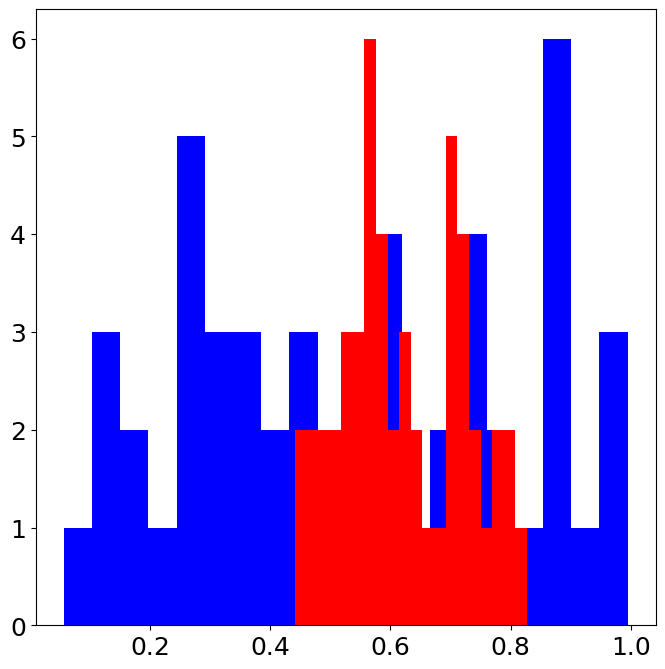

In [13]:
# Let's make a histogram:

# First we split the data based on the annotation: one vector of values for diseased subjects, and one for healthy ones
# Note that we have to do this "manually"
healthy_values = [beta for beta, condition in zip(simulated_beta, simulated_label) if condition=='H']
diseased_values = [beta for beta, condition in zip(simulated_beta, simulated_label) if condition=='D']

# Then make one plot for each with different colors
plt.hist(x=healthy_values, bins=20, color='b')
plt.hist(x=diseased_values, bins=20, color='r')

**We can run statistical tests on this data using the scipy library**

In [14]:
# We imported scipy earlier, but just as a reminder
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

t_statistic, p_value = ttest_ind(healthy_values, diseased_values)
print(p_value)

0.05155238689040729


In [15]:
statistic, p_value = wilcoxon(healthy_values, diseased_values)
print(p_value)

0.052989788310034314


# How about more realistic data?

### Generate more random data - you can hide this

In [37]:
n_samples=50
n_vars=80

np.random.seed(42)

# Some data for the diseased: half of the variables have uniform distributions
simulated_betas=np.random.rand(n_samples, int(np.floor(n_vars/2)) )

# The other half are normally distributed with random means between 0.5 and 0.9
for i in range(int(np.floor(n_vars/2))):
    new_col=np.random.normal(loc=random.uniform(0.5, 0.9), scale=0.1, size=(n_samples, 1))
    np.clip(new_col, 0, 1)
    simulated_betas=np.hstack((simulated_betas,new_col))

simulated_betas=np.vstack((simulated_betas,np.random.rand(n_samples, n_vars) ))

# Add labels for patients
simulated_labels = ['D']*n_samples+['H']*n_samples

# Add labels for genes
# Sample list of prefixes and suffixes to create fictional gene names
g_prefixes = ['OLIG1', 'TP53', 'EGFR', 'STAT', 'ATM', 'MYC', 'PORT', 'MAPK','TAC','SOL','ARTQ','BRAG','RCDLP','MT']
g_suffixes = ['_NC','A', 'B', 'C', 'D', 'E','F','-2','X','-1']

# Generate a list of 60 gene names
gene_names = random.sample([prefix + suffix for prefix in g_prefixes for suffix in g_suffixes], n_vars)

# Scramble the subject order
idx_s= np.arange(n_samples*2)
np.random.shuffle(idx_s)

# Scramble the variable order
idx_v= np.arange(n_vars)
np.random.shuffle(idx_v)

simulated_labels=np.array(simulated_labels)[idx_s]
gene_names=np.array(gene_names)[idx_v]

simulated_betas=simulated_betas[idx_s][:,idx_v]

## High dimensional data

**Now suppose you are running a modern experiment, with many variables per sample**

<br/><br/>


<img src="https://github.com/Leo-GG/bhs/blob/main/notebook_illustrations/premise2.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

<br/><br/>


In [17]:
#Let's see what are the dimensions of the data

# A data matrix
print(simulated_betas.shape)
# With patients labeled as healthy (H) or diseased (D)
print(simulated_labels.shape)
# And variables with gene-like names
print(gene_names.shape)

(100, 80)
(100,)
(80,)


**We can still use this, but it starts to become inconvenient**

- **We have three separated structures (data matrix, subject labels, gene labels) and we have to manipulate them individually**

- **We have to index things manually because these variables are not related to each other**

(array([2., 1., 2., 1., 3., 4., 4., 2., 2., 3., 1., 5., 0., 4., 4., 2., 3.,
        2., 1., 4.]),
 array([0.05261196, 0.09877032, 0.14492869, 0.19108705, 0.23724542,
        0.28340378, 0.32956214, 0.37572051, 0.42187887, 0.46803723,
        0.5141956 , 0.56035396, 0.60651233, 0.65267069, 0.69882905,
        0.74498742, 0.79114578, 0.83730414, 0.88346251, 0.92962087,
        0.97577924]),
 <BarContainer object of 20 artists>)

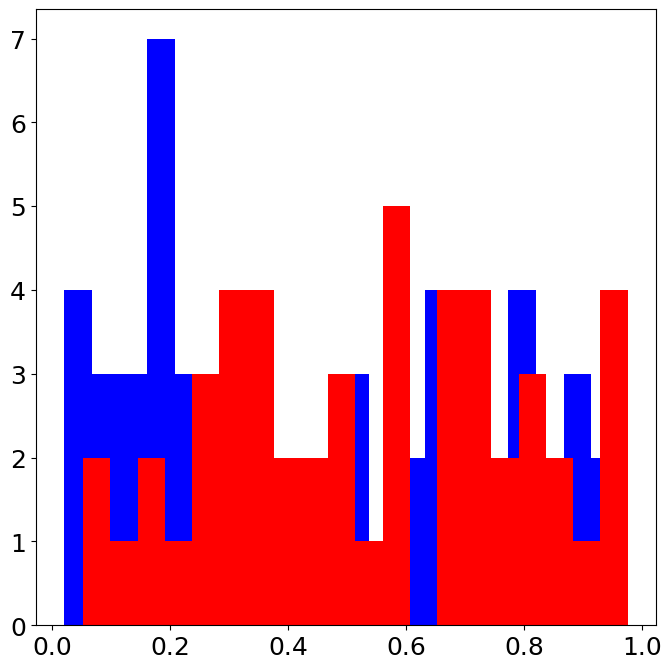

In [20]:
## Plot the value of a specific "gene" on both groups ##

# Get the index of the gene
idx = np.where(gene_names == 'ATMA')[0]
# Get the data from the matrix
gene_data=simulated_betas[:,idx].flatten()

# Split the data, get one array for diseased and one for healthy patients
healthy_values = [beta for beta, condition in zip(gene_data, simulated_labels) if condition=='H']
diseased_values = [beta for beta, condition in zip(gene_data, simulated_labels) if condition=='D']

# Then make separated plots to assign different colors
plt.hist(x=healthy_values, bins=20, color='b')
plt.hist(x=diseased_values, bins=20, color='r')

# Making your life easier with Pandas

**We can store our data and labels using a datastructure meant for tabular data: the *DataFrame* implemented in the [Pandas](https://pandas.pydata.org/) library**

<br/><br/>


<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.freecodecamp.org%2Fnews%2Fcontent%2Fimages%2F2020%2F07%2Fpandas-logo.png&f=1&nofb=1&ipt=33e1b23d5cea00213aa19a52eb3f25a71f2331d2cbd132120a90b295e40e9da9&ipo=images" alt="Pandas" style="width:600px; height:auto;"/>

<br/><br/>




**Using DataFrames instead of arrays makes it easier to index, explore and manipulate our data**
<br/><br/>



In [38]:
# Let's create a DataFrame from our simulated data

df=pd.DataFrame(data=simulated_betas)

In [39]:
# Now we can check how it looks, looking at the first few rows

df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.939499,0.813688,0.140924,0.358466,0.381444,0.195983,0.921874,0.665326,0.914700,0.866441,...,0.541329,0.495177,0.770625,0.723391,0.784020,0.258780,0.860769,0.909320,0.485423,0.311711
1,0.186590,0.292249,0.026608,0.962733,0.781462,0.840348,0.057002,0.984089,0.645928,0.747521,...,0.500620,0.911121,0.405472,0.184101,0.754827,0.048766,0.146615,0.760035,0.105650,0.438044
2,0.760785,0.758390,0.410383,0.892559,0.352501,0.427541,0.493796,0.428442,0.781586,0.707876,...,0.641071,0.623298,0.824107,0.783432,0.714970,0.310982,0.613777,0.063558,0.517068,0.729606


In [40]:
# We can use the pseudo-gene names to name the columns

df.columns=gene_names

In [41]:
df.head(3)

,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,TACX,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1
0,0.939499,0.813688,0.140924,0.358466,0.381444,0.195983,0.921874,0.665326,0.914700,0.866441,...,0.541329,0.495177,0.770625,0.723391,0.784020,0.258780,0.860769,0.909320,0.485423,0.311711
1,0.186590,0.292249,0.026608,0.962733,0.781462,0.840348,0.057002,0.984089,0.645928,0.747521,...,0.500620,0.911121,0.405472,0.184101,0.754827,0.048766,0.146615,0.760035,0.105650,0.438044
2,0.760785,0.758390,0.410383,0.892559,0.352501,0.427541,0.493796,0.428442,0.781586,0.707876,...,0.641071,0.623298,0.824107,0.783432,0.714970,0.310982,0.613777,0.063558,0.517068,0.729606


In [42]:
# And we will add the subject condition as an extra column

df['Condition']=simulated_labels

In [43]:
df.head(3)

,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1,Condition
0,0.939499,0.813688,0.140924,0.358466,0.381444,0.195983,0.921874,0.665326,0.914700,0.866441,...,0.495177,0.770625,0.723391,0.784020,0.258780,0.860769,0.909320,0.485423,0.311711,D
1,0.186590,0.292249,0.026608,0.962733,0.781462,0.840348,0.057002,0.984089,0.645928,0.747521,...,0.911121,0.405472,0.184101,0.754827,0.048766,0.146615,0.760035,0.105650,0.438044,H
2,0.760785,0.758390,0.410383,0.892559,0.352501,0.427541,0.493796,0.428442,0.781586,0.707876,...,0.623298,0.824107,0.783432,0.714970,0.310982,0.613777,0.063558,0.517068,0.729606,D


## Indexing a DataFrame

**Using DataFrames, it is easy to access data about a single gene, select subjects based their Condition label or select data using arbitrary criteria**

<br/><br/>


In [44]:
# Check the ARTQF and the MYCF genes

df[['ARTQF','MYCF']]

,ARTQF,MYCF
0,0.798955,0.797146
1,0.850853,0.640447
2,0.694741,0.648059
3,0.996224,0.816057
4,0.925868,0.872809
...,...,...
95,0.503073,0.620001
96,0.106801,0.060227
97,0.435589,0.732723
98,0.825888,0.398479


In [45]:
# ...but only on patients 8, 24, 7 and 63
df.loc[[8, 24, 7, 63], ['ARTQF','MYCF']]

,ARTQF,MYCF
8,0.119953,0.802396
24,0.192016,0.724913
7,0.202994,0.796948
63,0.914418,0.662930


In [46]:
# Subset by index
df.iloc[[9,23,5],[0,2,4,6]]

,MTA,PORT_NC,ARTQX,OLIG1X
9,0.942983,0.696689,0.055102,0.710352
23,0.277381,0.910927,0.505962,0.353352
5,0.832443,0.199674,0.461974,0.183405


In [48]:
# Use a arbitrary condition
df.loc[df.ARTQF>0.3]

,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1,Condition
0,0.939499,0.813688,0.140924,0.358466,0.381444,0.195983,0.921874,0.665326,0.914700,0.866441,...,0.495177,0.770625,0.723391,0.784020,0.258780,0.860769,0.909320,0.485423,0.311711,D
1,0.186590,0.292249,0.026608,0.962733,0.781462,0.840348,0.057002,0.984089,0.645928,0.747521,...,0.911121,0.405472,0.184101,0.754827,0.048766,0.146615,0.760035,0.105650,0.438044,H
2,0.760785,0.758390,0.410383,0.892559,0.352501,0.427541,0.493796,0.428442,0.781586,0.707876,...,0.623298,0.824107,0.783432,0.714970,0.310982,0.613777,0.063558,0.517068,0.729606,D
3,0.965449,0.586602,0.342226,0.928763,0.361216,0.977438,0.795110,0.019973,0.506045,0.534799,...,0.405197,0.008619,0.842945,0.406774,0.016913,0.320016,0.107451,0.445887,0.269630,H
4,0.665197,0.858843,0.383891,0.893893,0.519689,0.816599,0.877201,0.712247,0.845957,0.903230,...,0.181233,0.719774,0.885506,0.656641,0.574473,0.517443,0.741121,0.576669,0.139772,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.940180,0.475359,0.210047,0.257696,0.992092,0.387050,0.543596,0.359339,0.168834,0.492216,...,0.198131,0.585261,0.577020,0.262509,0.316375,0.772523,0.627258,0.221148,0.193717,H
95,0.511526,0.421774,0.416285,0.909587,0.303364,0.619121,0.156529,0.320060,0.509985,0.957979,...,0.520324,0.003656,0.071907,0.491738,0.215269,0.149399,0.965770,0.909006,0.197243,H
97,0.245632,0.584757,0.707523,0.480648,0.014856,0.855109,0.098969,0.440755,0.884245,0.570665,...,0.841809,0.191052,0.631775,0.532304,0.230084,0.052046,0.410505,0.257119,0.826217,H
98,0.304308,0.709785,0.975087,0.989280,0.874747,0.572315,0.449583,0.859503,0.316469,0.550545,...,0.113243,0.932504,0.355015,0.477146,0.477110,0.333704,0.861844,0.481900,0.679172,H


## Exploring the data

**Pandas provides convenient functions to explore the data**
<br/><br/>


In [49]:
# General statistics of each variable
df.describe()

,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,TACX,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.543699,0.632551,0.489662,0.541207,0.501752,0.522482,0.479287,0.607120,0.595102,0.711003,...,0.514029,0.465104,0.622253,0.626829,0.568634,0.492692,0.589048,0.508963,0.534851,0.501024
std,0.302385,0.285970,0.289877,0.318080,0.221495,0.269722,0.301059,0.247737,0.255431,0.271987,...,0.225202,0.292393,0.263662,0.265242,0.223535,0.307543,0.238970,0.314454,0.205655,0.286938
min,0.014393,0.027107,0.004940,0.027096,0.014015,0.012765,0.000717,0.000943,0.013640,0.015265,...,0.003720,0.003218,0.003656,0.009166,0.028122,0.015457,0.025349,0.005759,0.016969,0.009332
25%,0.264563,0.414751,0.222512,0.240283,0.380299,0.305077,0.229869,0.452433,0.463263,0.561351,...,0.392511,0.207481,0.405280,0.502052,0.427396,0.224769,0.435914,0.272309,0.430649,0.232464
50%,0.577191,0.716193,0.454934,0.564525,0.521459,0.501522,0.449591,0.678068,0.680215,0.812454,...,0.507672,0.453566,0.719436,0.720801,0.591475,0.481491,0.649319,0.540696,0.544784,0.501226
75%,0.830776,0.856732,0.721580,0.853050,0.624248,0.729352,0.735354,0.776372,0.782928,0.912544,...,0.639490,0.697428,0.820301,0.824327,0.746143,0.800230,0.742699,0.802270,0.675057,0.735295
max,0.996637,1.018153,0.977174,0.992484,0.992092,0.989125,0.989350,0.984089,0.945122,1.173203,...,0.983712,0.988262,1.007753,1.011829,0.966021,0.975865,0.961544,0.995802,0.948370,0.986001


In [50]:
# Average per gene (column)
df.mean()

<ipython-input-50-76c3837cb257>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


MTA        0.543699
TP53D      0.632551
PORT_NC    0.489662
TP53-1     0.541207
ARTQX      0.501752
             ...   
MTB        0.492692
MAPKA      0.589048
ARTQE      0.508963
PORTE      0.534851
MAPK-1     0.501024
Length: 80, dtype: float64

In [51]:
# Average per subject (row)
df.mean(axis=1)

<ipython-input-51-d5b04420a241>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=1)


0     0.600249
1     0.482299
2     0.602093
3     0.500008
4     0.634688
        ...   
95    0.504312
96    0.475459
97    0.498493
98    0.490580
99    0.490405
Length: 100, dtype: float64

In [52]:
# And many other options, e.g.

# Sum of rows (axis=0) or columns (axis=1)
df.sum(axis=0)

# Divide each column (except the last one) by its mean
df.iloc[:,:-1].div(df.mean(axis=0))
# ...

<ipython-input-52-5be71abe54f7>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.iloc[:,:-1].div(df.mean(axis=0))


,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,TACX,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1
0,1.727976,1.286361,0.287799,0.662345,0.760224,0.375100,1.923427,1.095872,1.537046,1.218618,...,1.053109,1.064659,1.238444,1.154049,1.378778,0.525237,1.461289,1.786615,0.907586,0.622149
1,0.343186,0.462017,0.054340,1.778861,1.557468,1.608377,0.118932,1.620914,1.085406,1.051361,...,0.973912,1.958961,0.651619,0.293703,1.327440,0.098979,0.248901,1.493302,0.197532,0.874298
2,1.399276,1.198940,0.838094,1.649200,0.702541,0.818288,1.030270,0.705695,1.313364,0.995602,...,1.247149,1.340127,1.324393,1.249833,1.257347,0.631190,1.041982,0.124878,0.966751,1.456231
3,1.775704,0.927359,0.698901,1.716096,0.719910,1.870759,1.658943,0.032898,0.850349,0.752176,...,0.411468,0.871197,0.013851,1.344777,0.715352,0.034327,0.543277,0.211117,0.833666,0.538158
4,1.223466,1.357746,0.783992,1.651664,1.035750,1.562924,1.830218,1.173156,1.421532,1.270361,...,0.886222,0.389661,1.156723,1.412675,1.154770,1.165988,0.878440,1.456139,1.078187,0.278974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.940825,0.666783,0.850147,1.680663,0.604611,1.184962,0.326587,0.527177,0.856970,1.347363,...,0.402451,1.118726,0.005876,0.114715,0.864770,0.436924,0.253629,1.897527,1.699550,0.393679
96,1.242575,0.314947,1.751270,0.445606,0.751103,1.489135,1.806924,1.462958,1.444533,0.464352,...,0.151463,0.237804,1.317190,0.108780,1.353142,0.472361,0.419255,1.953641,0.349863,0.378975
97,0.451778,0.924442,1.444920,0.888104,0.029609,1.636629,0.206491,0.725976,1.485871,0.802619,...,1.849323,1.809937,0.307033,1.007890,0.936111,0.466995,0.088356,0.806552,0.480730,1.649059
98,0.559698,1.122100,1.991347,1.827914,1.743387,1.095378,0.938025,1.415705,0.531789,0.774322,...,1.438584,0.243480,1.498594,0.566367,0.839110,0.968373,0.566515,1.693334,0.901000,1.355568


In [54]:
# You can also group values and apply operations to them

#Let's compute the mean of each "gene" on each group
df.groupby('Condition').mean()

,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,TACX,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1
Condition,,,,,,,,,,,,,,,,,,,,,
D,0.547389,0.812180,0.476762,0.527466,0.515998,0.467762,0.497327,0.714082,0.704542,0.883874,...,0.499936,0.498733,0.786382,0.788158,0.684595,0.495332,0.707128,0.493990,0.587759,0.459678
H,0.540009,0.452922,0.502562,0.554948,0.487505,0.577202,0.461247,0.500158,0.485662,0.538132,...,0.528123,0.431475,0.458123,0.465500,0.452673,0.490052,0.470968,0.523936,0.481942,0.542369


In [60]:
# If we do the difference between these means we will see the genes with large changes between groups
df.groupby('Condition').mean().diff(axis=0)

,MTA,TP53D,PORT_NC,TP53-1,ARTQX,ARTQ-2,OLIG1X,OLIG1-2,MAPKD,STAT-1,...,TACX,ATMF,ATMC,OLIG1_NC,PORTX,MTB,MAPKA,ARTQE,PORTE,MAPK-1
Condition,,,,,,,,,,,,,,,,,,,,,
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,-0.007381,-0.359259,0.0258,0.027482,-0.028493,0.109441,-0.03608,-0.213924,-0.21888,-0.345742,...,0.028187,-0.067258,-0.328259,-0.322658,-0.231922,-0.005279,-0.23616,0.029946,-0.105816,0.08269


## Making visualizations

**Pandas has native plotting functions. Not the most powerful ones, but very very easy to use**

<br/><br/>


array([<Axes: title={'center': 'D'}>, <Axes: title={'center': 'H'}>],
      dtype=object)

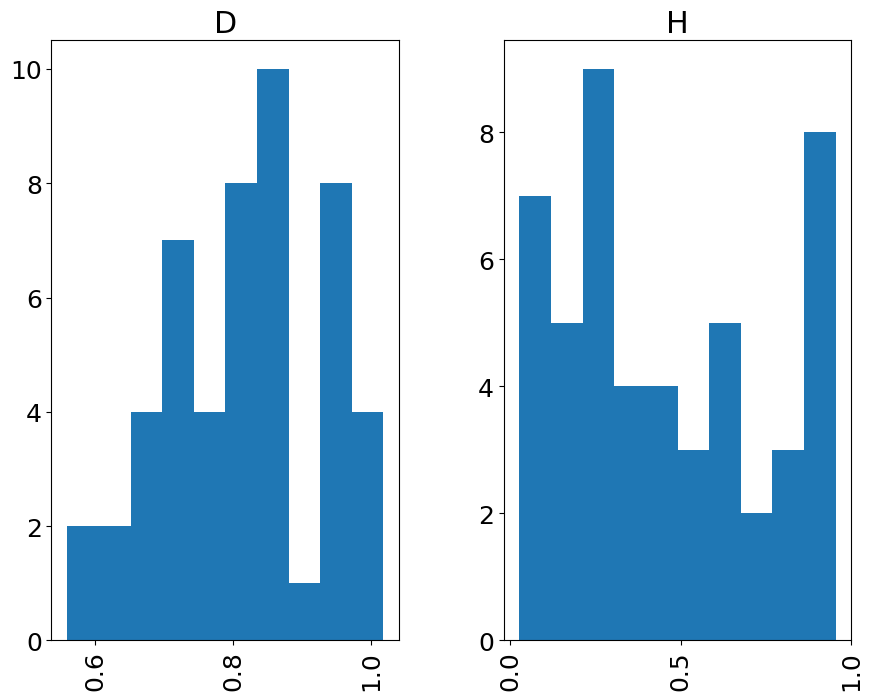

In [61]:
# Plot the histogram of one gene on each group
df.hist(by='Condition', column='TP53D', figsize=(10, 8))

TP53D    Axes(0.125,0.11;0.775x0.77)
dtype: object

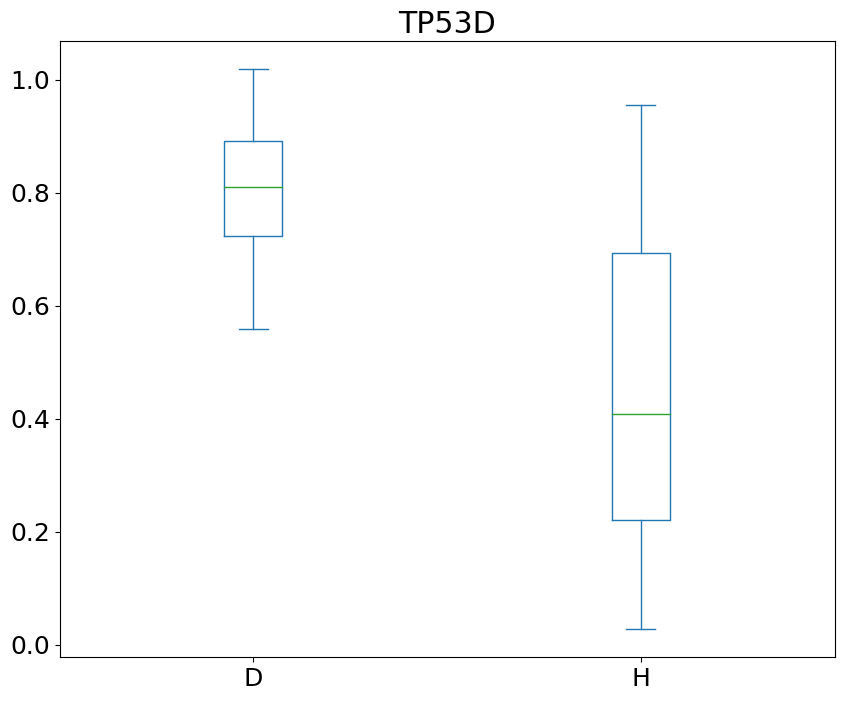

In [62]:
# Boxplots
df.plot.box(column="TP53D", by="Condition", figsize=(10, 8))

# Other libraries work great with DataFrames!

## Seaborn
**The Seaborn library provides many functions to plot data from dataframes, it makes very easy to create different types of visualizations**
<br/><br/>

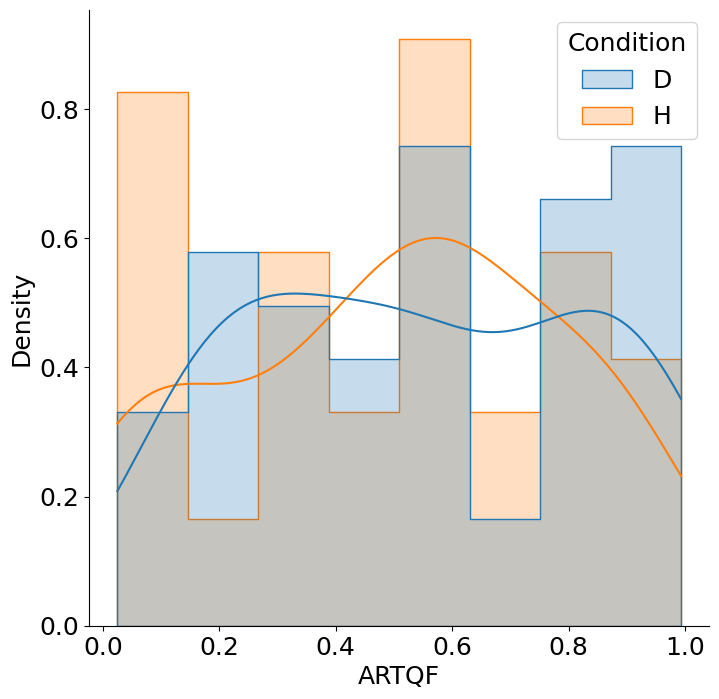

In [35]:
# Make histograms of a gene per group, include the estimated density functions
sns.histplot(data=df, x='ARTQF', hue='Condition', kde=True, element='step', stat='density')
sns.despine()

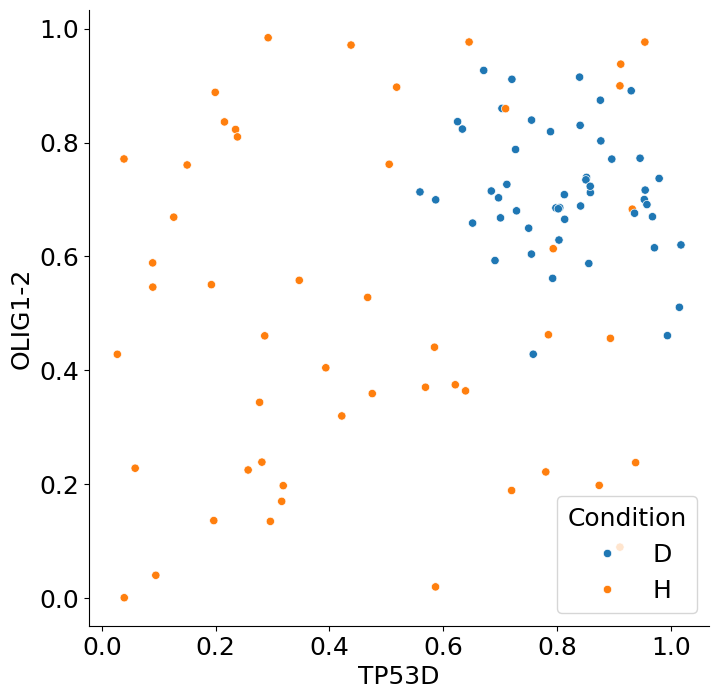

In [63]:
# Plot once gene against another, color by group
sns.scatterplot(data=df, x='TP53D', y='OLIG1-2', hue='Condition')
sns.despine()

## sci-kit learn
**The sci-kit learn (sklearn) library is a powerful library which implements many machine learning methods**

**You can use it to do regression, classification, clustering... in few lines of code!**

<br/><br/>

In [64]:
# E.g. make a classifier for our data using logistic regression

# First we have to import the model
from sklearn.linear_model import LogisticRegression
# And instantiate it
model = LogisticRegression()

# Then we directly *fit* the model to our data
# We use all the genes as features (X)
# The "Condition" label (diseased/healthy) as the target (y)
model.fit(X=df.iloc[:,:-1], y=df.Condition)

LogisticRegression()

In [65]:
# Use the model to predict the labels
model.predict(df.iloc[:,:-1])

array(['D', 'H', 'D', 'H', 'D', 'D', 'H', 'H', 'H', 'H', 'H', 'H', 'D',
       'D', 'D', 'H', 'H', 'D', 'D', 'H', 'H', 'H', 'H', 'D', 'H', 'H',
       'D', 'H', 'D', 'D', 'H', 'D', 'D', 'D', 'H', 'D', 'D', 'H', 'H',
       'D', 'D', 'D', 'H', 'H', 'D', 'D', 'D', 'H', 'H', 'D', 'D', 'D',
       'D', 'H', 'H', 'H', 'D', 'D', 'H', 'D', 'H', 'D', 'D', 'D', 'D',
       'D', 'H', 'D', 'H', 'H', 'H', 'D', 'D', 'D', 'H', 'D', 'H', 'D',
       'D', 'H', 'H', 'D', 'D', 'H', 'H', 'H', 'D', 'D', 'H', 'D', 'D',
       'D', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype=object)

In [66]:
# See the coefficients of the model (the "weight" of each feature in the predictions)
model.coef_

array([[-5.57698504e-02, -8.13837861e-01, -7.98282534e-06,
        -4.71934265e-02, -1.13389493e-02,  1.28993834e-01,
        -4.45362922e-02, -4.57185461e-01, -4.08265008e-01,
        -8.44378397e-01, -6.97546810e-01, -2.66977519e-01,
         2.48914710e-02,  2.48493127e-03, -1.23137824e-01,
        -1.31961171e-01,  1.31875144e-01, -6.54565184e-01,
        -4.85430015e-01, -6.20200072e-01, -4.61922386e-01,
        -1.42232834e-01, -1.07532969e-01, -6.21914741e-01,
         1.14664999e-01, -5.84167014e-01, -9.61992618e-02,
        -2.27006568e-01, -3.07090063e-01, -1.42096857e-01,
         9.85572861e-02, -9.11099839e-02, -2.48984892e-01,
        -7.70994432e-02, -6.65315875e-01, -7.29832484e-01,
        -7.24989223e-01, -7.28083432e-01, -7.74903427e-01,
        -5.93873164e-01, -2.06791333e-02,  8.63509966e-04,
         1.08289850e-01, -9.73391321e-01, -3.45627800e-02,
        -5.87346002e-01, -4.82786602e-02, -8.26217012e-01,
        -4.33800410e-01, -3.80532982e-02, -6.10072482e-0

In [67]:
# Compare the predictions to the real labels
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=df.Condition,  y_pred=model.predict(df.iloc[:,:-1]) )

print('Model accuracy: ' + str(acc) )


Model accuracy: 1.0


In [68]:
# ...

# Reading and writing your data
**Pandas includes functions to read and write data to and from csv, Excel files and formats for large datasets**

<br/><br/>

In [69]:
# Write your data in plain text to a file, in Comma Separated Values (csv) format
df.to_csv('My_data.csv')

In [ ]:
pd.read_csv('My_data.csv', index_col=0)

,STATA,PORTX,RCDLPE,SOLB,ARTQ-1,TP53-2,OLIG1E,RCDLP-2,EGFRE,TP53B,...,MYCE,PORTF,PORTA,RCDLPD,MAPKA,RCDLPA,PORTD,STATB,STATE,Condition
0,0.906096,0.289966,0.922735,0.346983,0.577251,0.322441,0.606386,0.866573,0.744390,0.868533,...,0.672226,0.573145,0.958392,0.676073,0.462082,0.665234,0.481882,0.684159,0.780679,D
1,0.901538,0.218195,0.192716,0.024868,0.481387,0.498697,0.543510,0.845710,0.678769,0.727027,...,0.976958,0.510887,0.534209,0.683735,0.765026,0.580489,0.585316,0.721164,0.748842,D
2,0.128673,0.118117,0.318138,0.543093,0.946080,0.039307,0.723749,0.575219,0.458111,0.537061,...,0.154411,0.428856,0.227768,0.639436,0.880609,0.270456,0.154815,0.978593,0.582099,H
3,0.732315,0.651810,0.412433,0.743514,0.289821,0.849638,0.377588,0.249050,0.697354,0.588791,...,0.159748,0.210486,0.625764,0.505561,0.675746,0.166252,0.407812,0.536100,0.118613,H
4,0.481497,0.104489,0.628645,0.769691,0.226612,0.623943,0.514755,0.393568,0.452407,0.088314,...,0.501525,0.201361,0.948299,0.471847,0.115893,0.378326,0.404491,0.479998,0.288962,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.932992,0.261214,0.318599,0.573285,0.140790,0.445114,0.828628,0.800364,0.976925,0.304650,...,0.629937,0.659082,0.250072,0.529116,0.609876,0.470112,0.881052,0.599749,0.838985,D
96,0.771976,0.329198,0.153792,0.562837,0.916716,0.531218,0.920750,0.743800,0.715480,0.675851,...,0.957955,0.394546,0.242676,0.715025,0.387553,0.455092,0.439948,0.669746,0.617631,D
97,0.798259,0.137921,0.353380,0.098263,0.222735,0.097810,0.845577,0.443038,0.972552,0.069153,...,0.463243,0.109419,0.280800,0.141400,0.293371,0.735274,0.717908,0.433128,0.908296,H
98,0.352615,0.694513,0.007878,0.587469,0.043012,0.555566,0.781686,0.208845,0.236770,0.352444,...,0.836596,0.123095,0.249516,0.446029,0.976717,0.501450,0.810299,0.053642,0.885812,H


In [ ]:
# You can also read and write to an excel file
df.to_excel('My_data.xlsx',sheet_name='simulated_data')

In [ ]:
pd.read_excel('My_data.xlsx',sheet_name='simulated_data', index_col=0)

,STATA,PORTX,RCDLPE,SOLB,ARTQ-1,TP53-2,OLIG1E,RCDLP-2,EGFRE,TP53B,...,MYCE,PORTF,PORTA,RCDLPD,MAPKA,RCDLPA,PORTD,STATB,STATE,Condition
0,0.906096,0.289966,0.922735,0.346983,0.577251,0.322441,0.606386,0.866573,0.744390,0.868533,...,0.672226,0.573145,0.958392,0.676073,0.462082,0.665234,0.481882,0.684159,0.780679,D
1,0.901538,0.218195,0.192716,0.024868,0.481387,0.498697,0.543510,0.845710,0.678769,0.727027,...,0.976958,0.510887,0.534209,0.683735,0.765026,0.580489,0.585316,0.721164,0.748842,D
2,0.128673,0.118117,0.318138,0.543093,0.946080,0.039307,0.723749,0.575219,0.458111,0.537061,...,0.154411,0.428856,0.227768,0.639436,0.880609,0.270456,0.154815,0.978593,0.582099,H
3,0.732315,0.651810,0.412433,0.743514,0.289821,0.849638,0.377588,0.249050,0.697354,0.588791,...,0.159748,0.210486,0.625764,0.505561,0.675746,0.166252,0.407812,0.536100,0.118613,H
4,0.481497,0.104489,0.628645,0.769691,0.226612,0.623943,0.514755,0.393568,0.452407,0.088314,...,0.501525,0.201361,0.948299,0.471847,0.115893,0.378326,0.404491,0.479998,0.288962,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.932992,0.261214,0.318599,0.573285,0.140790,0.445114,0.828628,0.800364,0.976925,0.304650,...,0.629937,0.659082,0.250072,0.529116,0.609876,0.470112,0.881052,0.599749,0.838985,D
96,0.771976,0.329198,0.153792,0.562837,0.916716,0.531218,0.920750,0.743800,0.715480,0.675851,...,0.957955,0.394546,0.242676,0.715025,0.387553,0.455092,0.439948,0.669746,0.617631,D
97,0.798259,0.137921,0.353380,0.098263,0.222735,0.097810,0.845577,0.443038,0.972552,0.069153,...,0.463243,0.109419,0.280800,0.141400,0.293371,0.735274,0.717908,0.433128,0.908296,H
98,0.352615,0.694513,0.007878,0.587469,0.043012,0.555566,0.781686,0.208845,0.236770,0.352444,...,0.836596,0.123095,0.249516,0.446029,0.976717,0.501450,0.810299,0.053642,0.885812,H


In [ ]:
# And you can use formats for large datasets, like Pickle or Parquet
df.to_pickle('My_data.pkl')

In [ ]:
pd.read_pickle('My_data.pkl')

,STATA,PORTX,RCDLPE,SOLB,ARTQ-1,TP53-2,OLIG1E,RCDLP-2,EGFRE,TP53B,...,MYCE,PORTF,PORTA,RCDLPD,MAPKA,RCDLPA,PORTD,STATB,STATE,Condition
0,0.906096,0.289966,0.922735,0.346983,0.577251,0.322441,0.606386,0.866573,0.744390,0.868533,...,0.672226,0.573145,0.958392,0.676073,0.462082,0.665234,0.481882,0.684159,0.780679,D
1,0.901538,0.218195,0.192716,0.024868,0.481387,0.498697,0.543510,0.845710,0.678769,0.727027,...,0.976958,0.510887,0.534209,0.683735,0.765026,0.580489,0.585316,0.721164,0.748842,D
2,0.128673,0.118117,0.318138,0.543093,0.946080,0.039307,0.723749,0.575219,0.458111,0.537061,...,0.154411,0.428856,0.227768,0.639436,0.880609,0.270456,0.154815,0.978593,0.582099,H
3,0.732315,0.651810,0.412433,0.743514,0.289821,0.849638,0.377588,0.249050,0.697354,0.588791,...,0.159748,0.210486,0.625764,0.505561,0.675746,0.166252,0.407812,0.536100,0.118613,H
4,0.481497,0.104489,0.628645,0.769691,0.226612,0.623943,0.514755,0.393568,0.452407,0.088314,...,0.501525,0.201361,0.948299,0.471847,0.115893,0.378326,0.404491,0.479998,0.288962,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.932992,0.261214,0.318599,0.573285,0.140790,0.445114,0.828628,0.800364,0.976925,0.304650,...,0.629937,0.659082,0.250072,0.529116,0.609876,0.470112,0.881052,0.599749,0.838985,D
96,0.771976,0.329198,0.153792,0.562837,0.916716,0.531218,0.920750,0.743800,0.715480,0.675851,...,0.957955,0.394546,0.242676,0.715025,0.387553,0.455092,0.439948,0.669746,0.617631,D
97,0.798259,0.137921,0.353380,0.098263,0.222735,0.097810,0.845577,0.443038,0.972552,0.069153,...,0.463243,0.109419,0.280800,0.141400,0.293371,0.735274,0.717908,0.433128,0.908296,H
98,0.352615,0.694513,0.007878,0.587469,0.043012,0.555566,0.781686,0.208845,0.236770,0.352444,...,0.836596,0.123095,0.249516,0.446029,0.976717,0.501450,0.810299,0.053642,0.885812,H


In [ ]:
df.to_parquet('My_data.parquet')

In [ ]:
pd.read_parquet('My_data.parquet')

,STATA,PORTX,RCDLPE,SOLB,ARTQ-1,TP53-2,OLIG1E,RCDLP-2,EGFRE,TP53B,...,MYCE,PORTF,PORTA,RCDLPD,MAPKA,RCDLPA,PORTD,STATB,STATE,Condition
0,0.906096,0.289966,0.922735,0.346983,0.577251,0.322441,0.606386,0.866573,0.744390,0.868533,...,0.672226,0.573145,0.958392,0.676073,0.462082,0.665234,0.481882,0.684159,0.780679,D
1,0.901538,0.218195,0.192716,0.024868,0.481387,0.498697,0.543510,0.845710,0.678769,0.727027,...,0.976958,0.510887,0.534209,0.683735,0.765026,0.580489,0.585316,0.721164,0.748842,D
2,0.128673,0.118117,0.318138,0.543093,0.946080,0.039307,0.723749,0.575219,0.458111,0.537061,...,0.154411,0.428856,0.227768,0.639436,0.880609,0.270456,0.154815,0.978593,0.582099,H
3,0.732315,0.651810,0.412433,0.743514,0.289821,0.849638,0.377588,0.249050,0.697354,0.588791,...,0.159748,0.210486,0.625764,0.505561,0.675746,0.166252,0.407812,0.536100,0.118613,H
4,0.481497,0.104489,0.628645,0.769691,0.226612,0.623943,0.514755,0.393568,0.452407,0.088314,...,0.501525,0.201361,0.948299,0.471847,0.115893,0.378326,0.404491,0.479998,0.288962,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.932992,0.261214,0.318599,0.573285,0.140790,0.445114,0.828628,0.800364,0.976925,0.304650,...,0.629937,0.659082,0.250072,0.529116,0.609876,0.470112,0.881052,0.599749,0.838985,D
96,0.771976,0.329198,0.153792,0.562837,0.916716,0.531218,0.920750,0.743800,0.715480,0.675851,...,0.957955,0.394546,0.242676,0.715025,0.387553,0.455092,0.439948,0.669746,0.617631,D
97,0.798259,0.137921,0.353380,0.098263,0.222735,0.097810,0.845577,0.443038,0.972552,0.069153,...,0.463243,0.109419,0.280800,0.141400,0.293371,0.735274,0.717908,0.433128,0.908296,H
98,0.352615,0.694513,0.007878,0.587469,0.043012,0.555566,0.781686,0.208845,0.236770,0.352444,...,0.836596,0.123095,0.249516,0.446029,0.976717,0.501450,0.810299,0.053642,0.885812,H
